In [1]:
import numpy as np
import csv

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from matplotlib import rc

filename1 = 'MonthlySolarRadLogan.txt'
filename2 = 'MonthlySolarRadAustin.txt'

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
radDataBos = np.zeros((12,24))
meanDataBos = np.zeros((1,24))
radDataAus = np.zeros((12,24))
meanDataAus = np.zeros((1,24))

lineCounter = 0
with open(filename1) as infile:
    for line in infile:

        line = " ".join(line.split())
        line = line.replace(' ',',').strip()
        lineData = line.split(',')
        #print lineData[2:]
        if lineCounter < 12:
            for i, d in enumerate(lineData[2:]):
                radDataBos[lineCounter, i] = float(d)

        else:
            for i, d in enumerate(lineData[2:]):
                meanDataBos[0,i] = float(d)

        lineCounter = lineCounter + 1

#print meanDataBos
#print np.average(radDataBos, axis=0)

In [3]:
lineCounter = 0
with open(filename2) as infile:
    for line in infile:

        line = " ".join(line.split())
        line = line.replace(' ',',').strip()
        lineData = line.split(',')
        #print lineData[2:]
        if lineCounter < 12:
            for i, d in enumerate(lineData[2:]):
                radDataAus[lineCounter, i] = float(d)

        else:
            for i, d in enumerate(lineData[2:]):
                meanDataAus[0,i] = float(d)

        lineCounter = lineCounter + 1

hours = np.linspace(1,24,24)

print np.shape(hours)
print np.shape(meanDataBos)

(24,)
(1, 24)


In [4]:
# interpolate the lines so they have 96 values
hrs = np.arange(0,25)
xi = np.linspace(0.25, 24, 96)
radDataAusI = np.zeros((12, len(xi)))
radDataBosI = np.zeros((12, len(xi)))
meanDataBosI = np.zeros((1, len(xi)))
for i in range(12):
    y = np.zeros((25))
    y[0:24] = radDataAus[i, :] 
    f = interp1d(hrs, y, kind='cubic')
    radDataAusI[i, :] = f(xi)
    if np.any(radDataAus[i,:]==0):
        for xx in np.where(radDataAus[i,:]==0)[0]:
            if xx<23:
                if y[xx+1] == 0:
                    radDataAusI[i, xx*4:(xx+1)*4] = 0
            else:
                radDataAusI[i, xx*4:(xx+1)*4] = 0
                
for i in range(12):
    y = np.zeros((25))
    y[0:24] = radDataBos[i, :] 
    f = interp1d(hrs, y, kind='cubic')
    radDataBosI[i, :] = f(xi)
    if np.any(radDataBos[i,:]==0):
        for xx in np.where(radDataAus[i,:]==0)[0]:
            if xx<23:
                if y[xx+1] == 0:
                    radDataBosI[i, xx*4:(xx+1)*4] = 0
            else:
                radDataAusI[i, xx*4:(xx+1)*4] = 0
                
                
y = np.zeros((25))
y[0:24] = meanDataBos[0, :] 
f = interp1d(hrs, y, kind='cubic')
meanDataBosI[0, :] = f(xi)
if np.any(meanDataBos[0,:]==0):
    for xx in np.where(meanDataBos[0,:]==0)[0]:
        if xx<23:
            if y[xx+1] == 0:
                meanDataBosI[0, xx*4:(xx+1)*4] = 0
        else:
            meanDataBosI[0, xx*4:(xx+1)*4] = 0

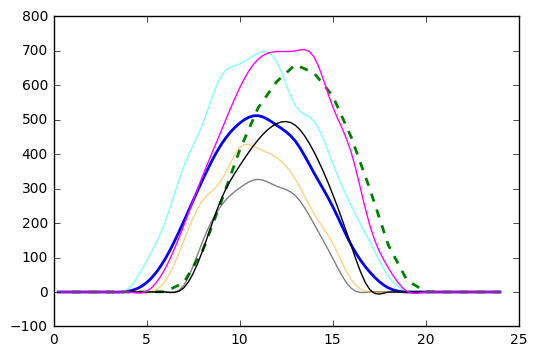

In [5]:
# plot the irradiance data for Boston for the year
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
BosLine, = ax0.plot(xi, meanDataBosI[0,:], color='blue', linewidth=2)
AusLine, = ax0.plot(hours, meanDataAus[0,:], color='green', linestyle='--', linewidth=2)
ax0.plot(xi, radDataBosI[0,:], color = 'black', alpha=0.5)
ax0.plot(xi, radDataBosI[9,:], color = 'orange', alpha=0.5)
ax0.plot(xi, radDataBosI[5,:], color = 'cyan', alpha=0.5)
ax0.plot(xi, radDataAusI[11,:], color = 'black', alpha=1)
ax0.plot(xi, radDataAusI[4,:], color = 'magenta', alpha=1)

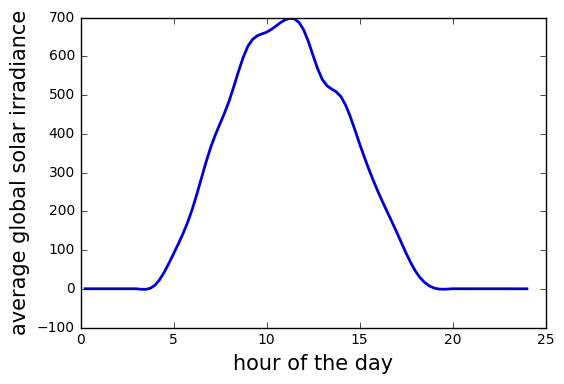

In [6]:
shiftedData = np.zeros((2,96))
shiftedData[0,0:92] = radDataAusI[1, 4:]
shiftedData[1,0:92] = radDataAusI[4, 4:]

relCorrection = np.zeros((3,96))
# correction from Aus Feb to Bos Av
absCorrection = meanDataBosI[0,:]-shiftedData[0,:]
relCorrection[0,:] = absCorrection/np.max(shiftedData[0,:])
CSFebData = shiftedData[0,:]+np.max(shiftedData[0,:])*relCorrection[0,:]
#correction from Aus may to Bos June
absCorrection = radDataBosI[5,:]-shiftedData[1,:]
relCorrection[1,:] = absCorrection/np.max(shiftedData[1,:])
CSMayData = shiftedData[1,:]+np.max(shiftedData[1,:])*relCorrection[1,:]
#correction from Aus may to Bos June
absCorrection = radDataBosI[0,:]-radDataAusI[11,:]
relCorrection[2,:] = absCorrection/np.max(radDataAusI[11,:])
CSDecData = radDataAusI[11,:]+np.max(radDataAusI[11,:])*relCorrection[2,:]

fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
#BosLine, = ax0.plot(xi, meanDataBosI[0,:], color='blue', linewidth=2)
#AusLine, = ax0.plot(hours, meanDataAus[0,:], color='green', linestyle='--', linewidth=2)
#ax0.plot(xi, CSFebData[0,:], color = 'red', alpha=1, linewidth=2)
ax0.plot(xi, CSMayData, color = 'blue', alpha=1, linewidth=2)
#ax0.plot(xi, CSDecData, color = 'green', alpha=1, linewidth=2)
#for j in [0,5]:
    #if j == 1:
    #    AprLine, = ax0.plot(xi, radDataAusI[j,:], color = 'red', linestyle='--', alpha=0.5)
    #ax0.plot(xi, radDataBosI[j,:], color = 'black', alpha=0.3)
ax0.plot(xi, radDataBosI[5,:], color = 'black', alpha=0.3)
ax0.set_xlabel('hour of the day', fontsize=15)
ax0.set_ylabel('average global solar irradiance', fontsize=15)
#ax0.set_title('Boston solar irradiance compared with Austin',fontsize=15)
# r1 = plt.line([0,1],[0,1], color="black", alpha=1)
# r2 = plt.line([0,1],[0,1], color="orange", alpha=1)
# r3 = plt.line([0,1],[0,1], color="red", linestyle='--',  alpha=1)
#ax0.legend([BosLine,AusLine,AprLine],['Boston av.','Austin av.','Austin Apr av.'],loc=2)
plt.show()

In [7]:
#np.savetxt('relCorrection.dat', relCorrection)

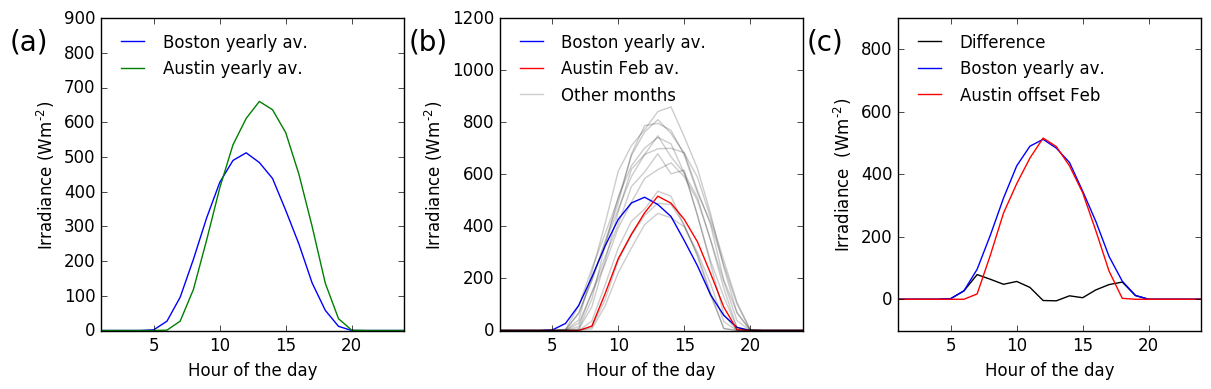

In [20]:
fs = 12

fig = plt.figure()
fig.set_size_inches(12, 4)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

l1, = ax1.plot(hours, meanDataBos.T, color='b', alpha=1)
l2, = ax1.plot(hours, meanDataAus.T, color='g', alpha=1)
ax1.set_xlabel('Hour of the day',fontsize=fs)
ax1.set_ylabel('Irradiance ($\mathregular{Wm^{-2}}$)',fontsize=fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.text(-0.3,0.9,'(a)',transform = ax1.transAxes,fontsize=20)
ax1.set_ylim([0,900])
ax1.set_xlim([1,24])
ax1.legend([l1,l2], ['Boston yearly av.','Austin yearly av.'], loc=2, frameon=False)

l1, = ax2.plot(hours, meanDataBos.T, color='b', alpha=1)
for i,r in enumerate(radDataAus):
    if i == 1:
        l2, = ax2.plot(hours, r, color='r', alpha=1)
    else:
        l3, = ax2.plot(hours, r, color='k', alpha=0.2)
ax2.set_xlabel('Hour of the day',fontsize=fs)
ax2.set_ylabel('Irradiance ($\mathregular{Wm^{-2}}$)',fontsize=fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.text(-0.3,0.9,'(b)',transform = ax2.transAxes,fontsize=20)
ax2.legend([l1,l2,l3], ['Boston yearly av.','Austin Feb av.', 'Other months'], loc=2, frameon=False)
ax2.set_ylim([0,1200])
ax2.set_xlim([1,24])

shiftedData = np.zeros((24))
shiftedData[0:23] = radDataAus[1,1:24]
absCorrection = meanDataBos[0,:]-shiftedData
l1, = ax3.plot(hours, absCorrection, color='k', alpha=1)
ax3.set_xlabel('Hour of the day',fontsize=fs)
ax3.set_ylabel(r'Irradiance  ($\mathregular{Wm^{-2}}$)',fontsize=fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.text(-0.3,0.9,'(c)',transform = ax3.transAxes,fontsize=20)
ax3.set_ylim([-100,900])
ax3.set_xlim([1,24])

l2, = ax3.plot(hours, meanDataBos[0,:], color='b')
l3, = ax3.plot(hours, shiftedData, color='r')
ax3.legend([l1,l2,l3], ['Difference','Boston yearly av.','Austin offset Feb'], loc=2, frameon=False)

fig.tight_layout()
#fig.savefig('Images/SolarAppendix1.png', dpi=300, format='png',  bbox_inches='tight')

In [9]:
print np.shape(meanDataBos)

(1, 24)
